# World Scope Geographic Sales Breakdown

This model uses Worldscope Geographic Segment data for sales to display the key countries and regions for the constituents of an index. The template then aggregates the data so users can see the breakdown for the index itself.

In [1]:
#Imporint Eikon and Main Modules

import eikon as ek
import configparser as cp
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

warnings.filterwarnings('ignore')
matplotlib.rc('axes.formatter', useoffset=False)

You should save a text file with **filename** `eikon.cfg` having the following contents:

    [eikon]
    app_id = YOUR_APP_ID_HERE
    
This file should be readily availble (e.g. in the current working directory) for the next steps.

In [2]:
cfg = cp.ConfigParser()
cfg.read('eikon.cfg')  # adjust for different file location

['eikon.cfg']

In [3]:
ek.set_app_key(cfg['eikon']['app_id']) #set_app_id function being deprecated

## Data API Fields

The fields providing geographic breakdown of the company's fundamentals are
- ```TR.BGS.GeoTotalRevenue```
- ```TR.BGS.GeoTotalRevenue.segmentName```

### TR.BGS.GeoTotalRevenue
Geographic Total Revenues (Calculated). 
* Value unit: Millions

### Nintendo 

RIC: 7974.T

In [18]:
df,err = ek.get_data('7974.T', ['TR.BGS.GeoTotalRevenue.segmentName', 'TR.BGS.GeoTotalRevenue'])
df

,Instrument,Segment Name,Geographic Total Revenues (Calculated)
0,7974.T,Japan,265722000000
1,7974.T,Americas,528895000000
2,7974.T,Europe,304552000000
3,7974.T,Other Foreign,101389000000
4,7974.T,Segment Total,1200558000000
5,7974.T,Consolidated Total,1200558000000


In [5]:
df.columns

Index(['Instrument', 'Segment Name', 'Geographic Total Revenues (Calculated)'], dtype='object')

In [19]:
df.rename(columns={'Instrument':'RIC',
                   'Segment Name':'Geographic',
                   'Geographic Total Revenues (Calculated)':'Sales in £m'},
         inplace = True)

In [7]:
df

,RIC,Geographic,Sales in £m
0,7974.T,Japan,265722000000
1,7974.T,Americas,528895000000
2,7974.T,Europe,304552000000
3,7974.T,Other Foreign,101389000000
4,7974.T,Segment Total,1200558000000
5,7974.T,Consolidated Total,1200558000000


In [8]:
df.loc[:,['Geographic']]

,Geographic
0,Japan
1,Americas
2,Europe
3,Other Foreign
4,Segment Total
5,Consolidated Total


In [9]:
df.dtypes

RIC            object
Geographic     object
Sales in £m     int64
dtype: object

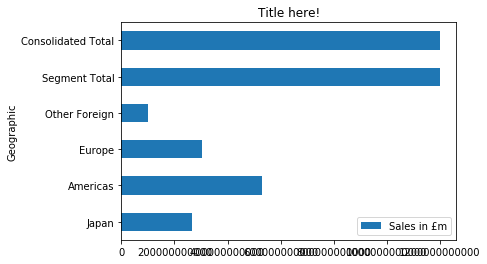

In [20]:
#graph = pd.DataFrame(df,columns = ["Segment Name","Geographic Total Revenues(Calculated)"])
#graph.plot(kind='bar')
df_nintendo = df.copy()

df_nintendo.set_index("Geographic",drop=True,inplace=True)
#df_nintendo.plot.bar(title = "Nintendo Geographic Sale Breakdown")
#plt.show()
f = plt.figure()
plt.ticklabel_format(style = 'plain')
plt.title('Title here!', color='black')
df_nintendo.plot(kind='barh', ax=f.gca())
plt.show()

### Sony
RIC: 6758.T

In [11]:
df,err = ek.get_data('6758.T', ['TR.BGS.GeoTotalRevenue.segmentName', 'TR.BGS.GeoTotalRevenue'])
df

,Instrument,Segment Name,Geographic Total Revenues (Calculated)
0,6758.T,Japan,2591784000000
1,6758.T,United States,1982135000000
2,6758.T,Europe,1862166000000
3,6758.T,China,770416000000
4,6758.T,Other Regions,546993000000
5,6758.T,Asia/Oceania,912193000000
6,6758.T,Segment Total,8665687000000
7,6758.T,Consolidated Total,8665687000000


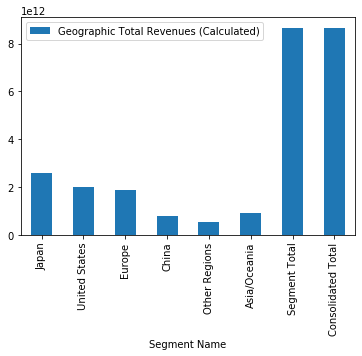

In [12]:
df.set_index("Segment Name",drop=True,inplace=True)
df.plot.bar()
plt.show()

### SEGA

RIC: 6460.T

In [13]:
df,err = ek.get_data('6460.T', ['TR.BGS.GeoTotalRevenue.segmentName', 'TR.BGS.GeoTotalRevenue'])
df

,Instrument,Segment Name,Geographic Total Revenues (Calculated)
0,6460.T,Japan,277903000000
1,6460.T,Northern America,33373000000
2,6460.T,Europe,10937000000
3,6460.T,Other,9433000000
4,6460.T,Segment Total,331646000000
5,6460.T,Consolidated Total,331646000000


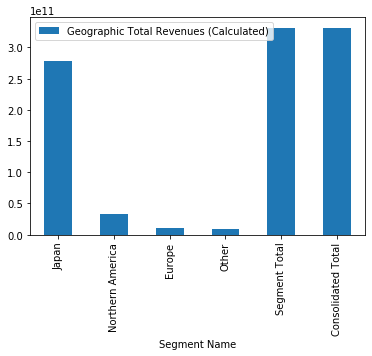

In [14]:
df.set_index("Segment Name",drop=True,inplace=True)
df.plot.bar()
plt.show()

### Konami

RIC: 9766.T

In [15]:
df,err = ek.get_data('9766.T', ['TR.BGS.GeoTotalRevenue.segmentName', 'TR.BGS.GeoTotalRevenue'])
df

,Instrument,Segment Name,Geographic Total Revenues (Calculated)
0,9766.T,Japan,201775000000
1,9766.T,Europe,12890000000
2,9766.T,Asia/Oceania,7537000000
3,9766.T,Americas,40347000000
4,9766.T,Segment Total,262549000000
5,9766.T,Consolidated Total,262549000000


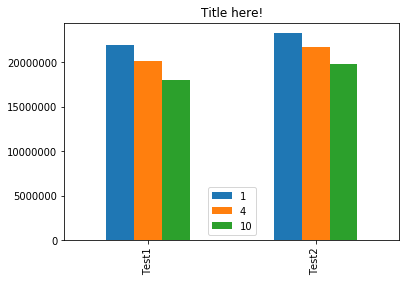

In [16]:
a = {'Test1': {1: 21867186, 4: 20145576, 10: 18018537},
     'Test2': {1: 23256313, 4: 21668216, 10: 19795367}}

d = pd.DataFrame(a).T
#print d

f = plt.figure()

#plt.ticklabel_format(style = 'plain')
plt.ticklabel_format(style = 'plain')
plt.title('Title here!', color='black')
d.plot(kind='bar', ax=f.gca())

plt.show()